আগেরটার সাথে এখানে চেঞ্জ হিসেবে থাকবে শুধু নাল ভ্যালু এবং আউটলেয়ার ফিক্স করবো যার যার কলামের মেডিয়ান এবং মোড দিয়ে । 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Apply the default seaborn theme, scaling, and color palette

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
numerical = ['Age']
categorical = ['Cabin','Embarked']
for num in numerical:
    df[num].fillna(df[num].median(),inplace=True)

for cat in categorical:
    df[cat].fillna(df[cat].value_counts().index[0],inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

এখানে কিন্তু যার যার কলামের মেডিয়ান আর মোড দিয়ে ফিক্স করেছি ভ্যালু । আগেরটার মতো ফুল ডেটাসেটের মেডিয়ান দিয়ে নয় । 
মনে রাখবেন ক্যাটাগরিক্যাল ভ্যালু ফিক্সের ক্ষেত্রে মেডিয়ান ইউজ করতে পারবেন না । কারণ মেডিয়ান হয় শুধু নিউমেরিক্যাল ভ্যালুর । 

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
numerical = ['Age','Fare']
categorical = ['Cabin']
for num in numerical:
    test[num].fillna(test[num].median(),inplace=True)

for cat in categorical:
    test[cat].fillna(test[cat].value_counts().index[0],inplace=True)
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

আউটলেয়ার যার যার কলামের মেডিয়ান দিয়ে ফিক্স করা হলো । 

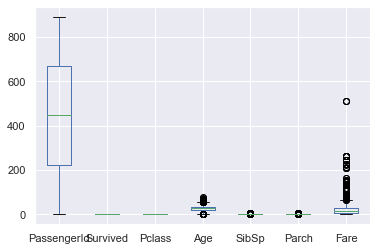

In [9]:
df.plot(kind='box')
plt.show()

আউটলেয়ার ফিক্সড!

In [10]:
del df['Name']
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,B96 B98,S


In [11]:
def detect_outlier(feature):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    
    return feature.index[(feature<lower_bound)|(feature>upper_bound)].tolist()

In [12]:
num_cols = ['Fare','Age']

for col in num_cols:
    indx = detect_outlier(df[col])
    df[col].loc[indx] = df[col].median()

আউটলেয়ার যার যার কলামের মেডিয়ান দিয়ে ফিক্স করা হলো । 

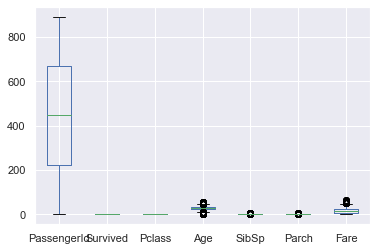

In [13]:
df.plot(kind='box')
plt.show()

আউটলেয়ার ফিক্সড!

In [14]:
cat_cols = ['Sex','SibSp','Parch','Ticket','Cabin','Embarked']

for col in cat_cols:
    df[col] = df[col].astype('category')
    #print(col,'---->', dict(enumerate(df[col].cat.categories)))
    df[col] = df[col].cat.codes
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,523,7.2500,47,2
1,2,1,1,0,38.0,1,0,596,14.4542,81,0
2,3,1,3,0,26.0,0,0,669,7.9250,47,2
3,4,1,1,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,1,35.0,0,0,472,8.0500,47,2


In [15]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,28.476992,0.507295,0.381594,338.528620,17.383622,53.639731,1.536476
std,257.353842,0.486592,0.836071,0.477990,9.793559,1.005995,0.806057,200.850657,12.713016,23.568293,0.791503
min,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,23.750000,0.000000,0.000000,158.500000,7.910400,47.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,337.000000,14.454200,47.000000,2.000000
75%,668.500000,1.000000,3.000000,1.000000,33.000000,1.000000,0.000000,519.500000,24.150000,47.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,54.000000,6.000000,6.000000,680.000000,65.000000,146.000000,2.000000


In [16]:
corr_mtx = df.corr()
corr_mtx

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.048426,-0.065229,-0.001652,-0.056554,0.002589,-0.018086,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.020426,-0.026385,0.081629,-0.164549,0.190926,0.175690,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.280164,0.078141,0.018443,0.319869,-0.433904,-0.248495,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.052151,-0.123164,-0.245489,0.059372,-0.102979,-0.102643,0.108262
Age,0.048426,-0.020426,-0.280164,0.052151,1.000000,-0.192005,-0.118873,-0.072873,0.079879,0.118359,-0.000725
SibSp,-0.065229,-0.026385,0.078141,-0.123164,-0.192005,1.000000,0.423338,0.069238,0.291704,-0.001666,0.065635
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.118873,0.423338,1.000000,0.020003,0.293337,0.022682,0.039798
Ticket,-0.056554,-0.164549,0.319869,0.059372,-0.072873,0.069238,0.020003,1.000000,-0.231260,-0.072200,-0.001729
Fare,0.002589,0.190926,-0.433904,-0.102979,0.079879,0.291704,0.293337,-0.231260,1.000000,0.129078,-0.023439
Cabin,-0.018086,0.175690,-0.248495,-0.102643,0.118359,-0.001666,0.022682,-0.072200,0.129078,1.000000,0.023804


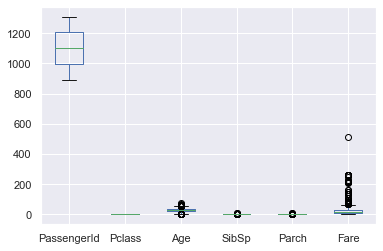

In [17]:
test.plot(kind='box')
plt.show()

In [18]:
for col in num_cols:
    indx = detect_outlier(test[col])
    test[col].loc[indx] = test[col].median()

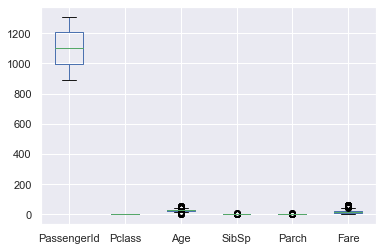

In [19]:
test.plot(kind='box')
plt.show()

In [20]:
for col in cat_cols:
    test[col] = test[col].astype('category')
    #print(col,'---->', dict(enumerate(df[col].cat.categories)))
    test[col] = test[col].cat.codes
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,152,7.8292,15,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,221,7.0000,15,2
2,894,2,"Myles, Mr. Thomas Francis",1,27.0,0,0,73,9.6875,15,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,147,8.6625,15,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,138,12.2875,15,2


In [21]:
corr_mtx = test.corr()
corr_mtx

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.026751,0.023245,0.029099,-0.002157,0.034036,-0.012301,-0.022608,0.029253,0.040699
Pclass,-0.026751,1.000000,0.108615,-0.359749,-0.008977,0.011067,0.292088,-0.519219,-0.357330,0.227983
Sex,0.023245,0.108615,1.000000,0.003631,-0.105519,-0.169750,-0.047663,-0.147965,-0.064809,0.076281
Age,0.029099,-0.359749,0.003631,1.000000,-0.130237,-0.015546,-0.064028,0.149711,0.101841,-0.126325
SibSp,-0.002157,-0.008977,-0.105519,-0.130237,1.000000,0.334818,0.014975,0.235756,0.029176,0.049236
Parch,0.034036,0.011067,-0.169750,-0.015546,0.334818,1.000000,0.107950,0.207585,0.009311,0.051827
Ticket,-0.012301,0.292088,-0.047663,-0.064028,0.014975,0.107950,1.000000,-0.184240,-0.169111,0.093672
Fare,-0.022608,-0.519219,-0.147965,0.149711,0.235756,0.207585,-0.184240,1.000000,0.187074,-0.042164
Cabin,0.029253,-0.357330,-0.064809,0.101841,0.029176,0.009311,-0.169111,0.187074,1.000000,-0.179306
Embarked,0.040699,0.227983,0.076281,-0.126325,0.049236,0.051827,0.093672,-0.042164,-0.179306,1.000000


In [22]:
del test['Name']
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,152,7.8292,15,1
1,893,3,0,47.0,1,0,221,7.0000,15,2
2,894,2,1,27.0,0,0,73,9.6875,15,1
3,895,3,1,27.0,0,0,147,8.6625,15,2
4,896,3,0,22.0,1,1,138,12.2875,15,2


In [23]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=7)



In [24]:
X_train = df.loc[:, df.columns!='Survived']
Y_train = df.loc[:, df.columns=='Survived']
X_test = test.loc[:,]
tree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

In [25]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,523,7.2500,47,2
1,2,1,1,0,38.0,1,0,596,14.4542,81,0
2,3,1,3,0,26.0,0,0,669,7.9250,47,2
3,4,1,1,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,1,35.0,0,0,472,8.0500,47,2


In [26]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,152,7.8292,15,1
1,893,3,0,47.0,1,0,221,7.0000,15,2
2,894,2,1,27.0,0,0,73,9.6875,15,1
3,895,3,1,27.0,0,0,147,8.6625,15,2
4,896,3,0,22.0,1,1,138,12.2875,15,2


In [27]:
Y_pred = tree.predict(X_test)
Y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,

In [28]:
Y_ID = test.loc[:, test.columns=='PassengerId']
Y_ID = Y_ID.values

prediction = pd.DataFrame({ 'PassengerId':Y_ID.ravel(),'Survived': Y_pred.ravel()})

prediction.to_csv("Pred3.csv",index=False)

File Name: Pred3.csv

যথারীতি সাবমিট করে ফেলেন এই সিএসভি ফাইলটিকে । 
তো নিজ নিজ কলামের মিডিয়ান দেয়ার পরে  আমাদের একুরেসি কতো এলো সাবমিশনের পরে? দেখেন তো এমন কিনা । <img src="pred3.jpg">

44% Accuracy! 😢😢😢😢

হতাশ হলেন নাকি?😁  হতাশ হবার কিছু নাই । এমন অনেক হবে । আবার বাউন্স ব্যাক করবো !এতক্ষন ছোট ছোট ডুব দিয়েছি । এবার দেবো বড় ডুব । ব্যাপারগুলোর সাথে ইজি করতে একবারে গভীরে গেলাম না । এখন আশা করি সবাই মোটামোটি বুঝে গিয়েছেন আসলে কি করতে হবে । তাই এবার বড় ডুব দেবো ।  চলেন চলে যাই titanic_4th_try.ipynb তে । 